# k-means é um metodos nao suupervisionado que permite a indentificação de grupos em nossos dados
## ele funciona com dois fatores 
* ## 1 - o numero de grupos que voce quer encontrar 
* ## 2 - valores medios mais proximos 

----

## Pré-requisitos 
* ## 1- coloque as variaveis usadas em escala 
* ## 2 - caso nao saiba o numero de grupos que voce quer ultilize o scaterplot para ter uma ideia

---
# Precisão e Revocação
* ### Precisão: É a medida de relevancia do model | uma alta precisão indica uma alta acuracia
---
* ### Revocação: É a medida de completude do modelo | porcentagem das resposta relevantes encontradas

In [109]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 7.5 , 6

df_iris = pd.read_csv("Iris")

cor = df_iris['Species']

iris = datasets.load_iris()

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [110]:
df_iris = df_iris.replace('Iris-setosa', 0)
df_iris = df_iris.replace('Iris-virginica', 1)
df_iris = df_iris.replace('Iris-versicolor', 2)

In [111]:
df_iris['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

In [112]:
df_iris = df_iris.drop('Id', axis=1) 
x = df_iris.drop('Species', axis=1)
scale(x)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

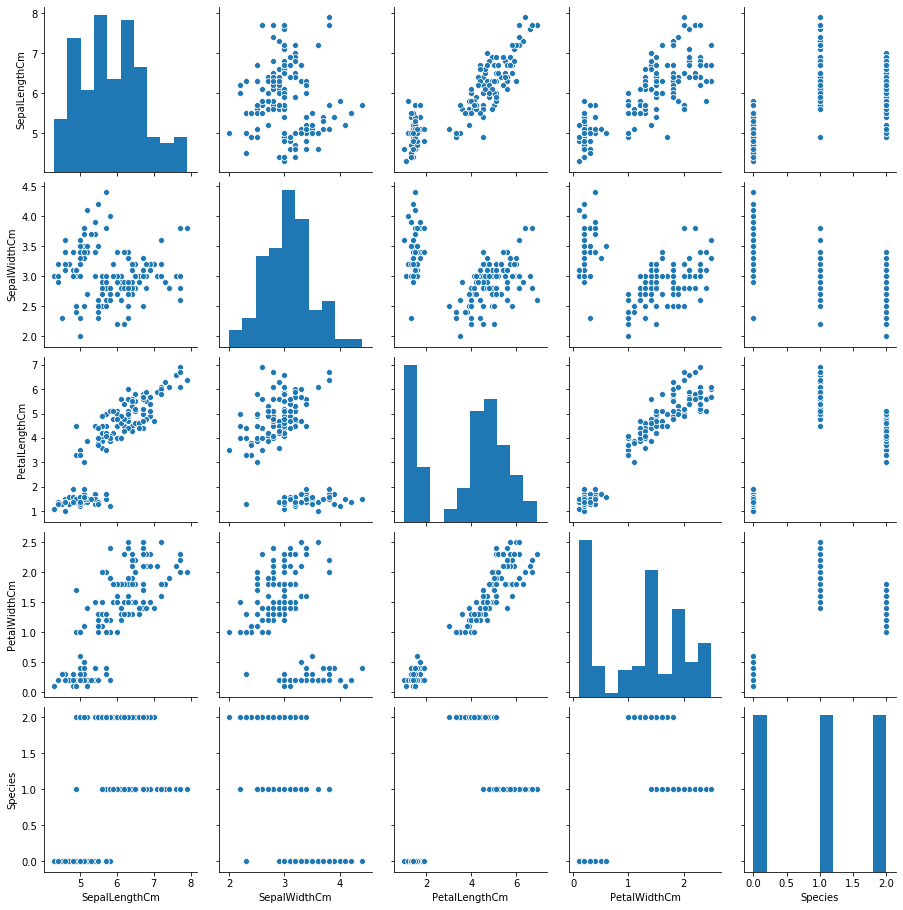

In [113]:
sns.pairplot(df_iris)

In [114]:
df_iris['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

### Vemos que é possivel dividir em 3 grupos pois temos 3 especies 

In [115]:
cluster = KMeans(n_clusters=3, random_state=5)
cluster.fit(x)
df_iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.460039
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.612165
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.649101
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.580749
Species,0.460039,-0.612165,0.649101,0.580749,1.000000


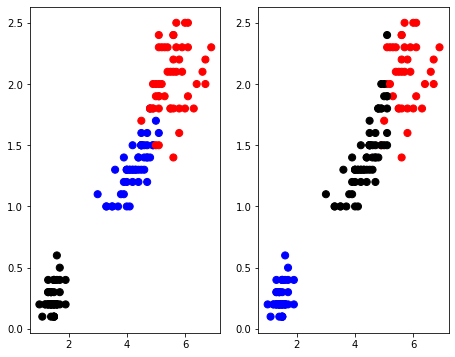

In [116]:
cores = np.array(['black', 'blue', 'red', 'green'])
plt.subplot(1, 2, 1)
plt.scatter(x=df_iris['PetalLengthCm'], y=df_iris['PetalWidthCm'], s=50, c=cores[iris.target])

plt.subplot(1, 2, 2)
plt.scatter(x=df_iris['PetalLengthCm'], y=df_iris['PetalWidthCm'], s=50, c=cores[cluster.labels_])

# Metrica

In [125]:
relabel = np.choose(cluster.labels_, [2,0,1]).astype(np.int64)# obrigatorio para fazer a metrica
metrica = classification_report(df_iris['Species'], relabel)
print(metrica)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.95      0.72      0.82        50
           2       0.77      0.96      0.86        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

